In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from datetime import datetime

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %H:%T:$S')
df.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:xlabel='date'>

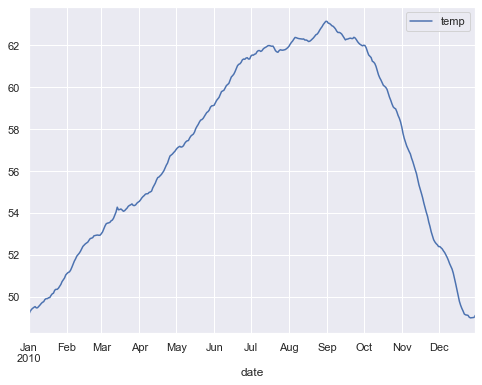

In [6]:
df.resample('D').mean().plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

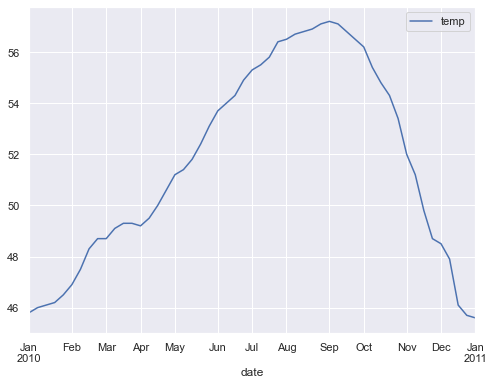

In [7]:
df.resample('W').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

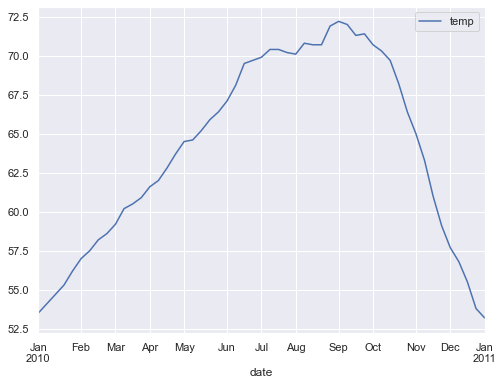

In [8]:
df.resample('W').max().plot()

### 4. Which month is the coldest, on average?

In [9]:
data_by_month = pd.DataFrame(df.resample('1m').mean())

In [10]:
df.resample('M').mean().reset_index().temp.min()

49.984139784946244

In [11]:
data_by_month[data_by_month.temp == data_by_month.temp.min()].index.month_name()

Index(['January'], dtype='object', name='date')

### 5. Which month has the highest average temperature?

In [12]:
df.resample('M').mean().reset_index().temp.agg('max')

62.48708333333335

In [13]:
data_by_month[data_by_month.temp == data_by_month.temp.max()].index.month_name()

Index(['September'], dtype='object', name='date')

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [14]:
# data_by_day = pd.DataFrame(df.resample('1d').mean())
# # data_by_day.temp.min(), data_by_day.temp.max()
# data_by_day.head()

In [15]:
# min_max_by_day = df.resample('1d').temp.agg(['min','max'])

# # min_max_by_day['diff'] = min_max_by_day.max() - min_max_by_day.min()

In [16]:
# min_max_by_day

#this df was giving me issues with the min max columns and adding/subtracting

In [17]:
daily = df.temp.resample('D').agg(['min','max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [18]:
daily['temp_diff'] = daily['max'] - daily['min']

In [19]:
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [20]:
daily.resample('M').max().temp_diff.sort_values()

date
2010-12-31    8.90
2010-01-31    9.30
2010-02-28    9.90
2010-11-30   11.80
2010-03-31   12.00
2010-04-30   13.00
2010-05-31   13.10
2010-10-31   14.40
2010-06-30   14.80
2010-07-31   14.80
2010-09-30   14.90
2010-08-31   15.00
Name: temp_diff, dtype: float64

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

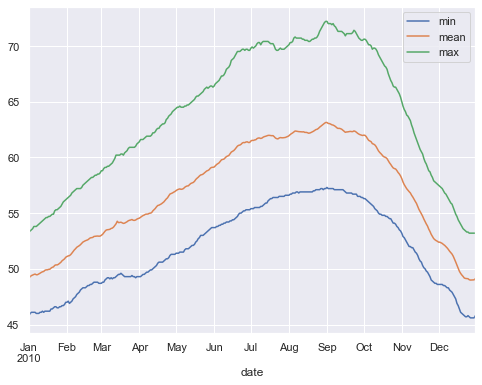

In [21]:
df.temp.resample('D').agg(['min','mean','max']).plot()

# WEATHER DATASET

In [22]:
from vega_datasets import data
df = data.seattle_weather()

In [23]:
# %timeit df.head()

In [24]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [25]:
df.date.head(5)

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: date, dtype: datetime64[ns]

In [26]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [27]:
df.resample('M').sum().precipitation.sort_values().tail()

date
2012-03-31   183.00
2012-11-30   210.50
2015-11-30   212.60
2014-03-31   240.00
2015-12-31   284.50
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

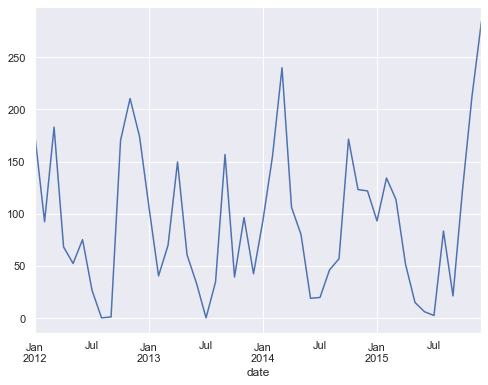

In [28]:
df.resample('M').sum().precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

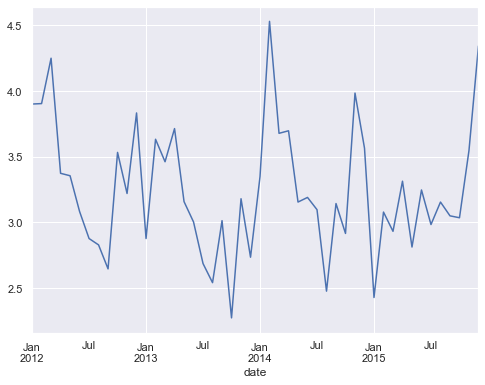

In [29]:
df.resample('M').wind.mean().plot()

### 4. Which year-month combination is the windiest?

In [30]:
df.resample('M').mean().wind.sort_values().tail()

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [31]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [32]:
# df.weather.sample(30)
df['is_sunny'] = df.weather == 'sun'
df

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False
...,...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog,False
2015-12-28,1.50,5.00,1.70,1.30,fog,False
2015-12-29,0.00,7.20,0.60,2.60,fog,False


In [33]:
# is_sunny.resample('D').mean() # this was trying to work on my previous df
df.resample('Y').is_sunny.mean()

date
2012-12-31   0.32
2013-12-31   0.56
2014-12-31   0.58
2015-12-31   0.49
Freq: A-DEC, Name: is_sunny, dtype: float64

### 6. In which month does it rain the most?

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [35]:
df['month'] = df.index.month
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1


In [36]:
df['is_rainy'] = df.weather == 'rain'
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,is_rainy
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1,True


In [37]:
df.resample('M').mean().is_rainy.sort_values().tail()

date
2012-06-30   0.63
2012-04-30   0.63
2012-12-31   0.74
2013-02-28   0.82
2012-11-30   0.83
Name: is_rainy, dtype: float64

In [38]:
df.groupby('month').precipitation.sum().sort_values()

month
7     48.20
6    132.90
8    163.70
5    207.50
9    235.50
4    375.40
2    422.00
1    466.00
10   503.40
3    606.20
12   622.70
11   642.50
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [39]:
df.resample('M').is_rainy.mean().sort_values().tail()

date
2012-06-30   0.63
2012-04-30   0.63
2012-12-31   0.74
2013-02-28   0.82
2012-11-30   0.83
Name: is_rainy, dtype: float64

In [40]:
df.groupby('month').is_rainy.mean().sort_values().tail()

month
12   0.19
11   0.21
1    0.28
3    0.30
2    0.35
Name: is_rainy, dtype: float64

#### The preceding 2 cells are a nice try, but we're shooting for "non-zero" precipitation....so

In [41]:
df['did_rain'] = df.precipitation > 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,is_rainy,did_rain
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1,True,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1,True,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1,True,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1,True,True


In [42]:
df.groupby('month').did_rain.mean().sort_values().tail()

month
1    0.53
3    0.59
11   0.59
2    0.65
12   0.65
Name: did_rain, dtype: float64

- That's the correct answer

# FLIGHTS DATASET

In [43]:
df = data.flights_20k()
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative delays to 0.

In [44]:
df['abs_delay'] = df.delay.abs()
df.head()

,delay,distance,origin,destination,abs_delay
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,14
2001-01-01 06:20:00,0,491,BNA,MCI,0
2001-01-01 06:30:00,-8,251,MDW,STL,8
2001-01-01 07:00:00,-10,361,OAK,ONT,10
2001-01-01 07:00:00,0,303,MSY,HOU,0


- whoops, the question said to turn them to 0, which makes more sense....reworking, but leaving the abs_delay intact for fun

In [55]:
df.delay = np.where(df.delay < 0, 0, df.delay)

### Which hour of the day has the highest average delay?

In [46]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,abs_delay,hour
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,14,0
2001-01-01 06:20:00,0,491,BNA,MCI,0,6
2001-01-01 06:30:00,0,251,MDW,STL,8,6
2001-01-01 07:00:00,0,361,OAK,ONT,10,7
2001-01-01 07:00:00,0,303,MSY,HOU,0,7


In [47]:
df.groupby('hour').abs_delay.mean().sort_values().tail()

hour
22    34.21
23    66.55
0    127.92
1    170.00
3    302.50
Name: abs_delay, dtype: float64

- calculating by absolute delay vs my new delay has no difference

In [48]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

- I think it's best to use the original 'delay' column bc early flights should count as "credit" against delayed flights
- in fact, i later turned any negative delays into 0

### Does the day of the week make a difference in the delay amount?

In [49]:
df['day_of_week'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,abs_delay,hour,day_of_week
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,14,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,0,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,8,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,10,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,0,7,Monday


In [50]:
df.groupby('day_of_week').delay.mean()

day_of_week
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

### Does the month make a difference in the delay amount?

In [51]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,abs_delay,hour,day_of_week,month
date,,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,14,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,0,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,8,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,10,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,0,7,Monday,January


In [52]:
df.groupby('month').delay.mean()

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

# BONUS

In [56]:
df = data.iowa_electricity().set_index('year').sort_index()
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [58]:
df.shape

(51, 2)

### For each row, calculate the percentage of the year's total that energy source provided.

### Lineplot of generation over time, color by source
### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
### Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - Express each number as a % of the year's total